In [764]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns 
import matplotlib.pyplot as plt


In [765]:
df = pd.read_csv('AccidentesAviones.csv')

In [766]:
# Se suprimen todos los warnings
warnings.filterwarnings("ignore")

In [767]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5008 non-null   int64 
 1   fecha                   5008 non-null   object
 2   HORA declarada          5008 non-null   object
 3   Ruta                    5008 non-null   object
 4   OperadOR                5008 non-null   object
 5   flight_no               5008 non-null   object
 6   route                   5007 non-null   object
 7   ac_type                 5008 non-null   object
 8   registration            5008 non-null   object
 9   cn_ln                   5008 non-null   object
 10  all_aboard              5008 non-null   object
 11  PASAJEROS A BORDO       5008 non-null   object
 12  crew_aboard             5008 non-null   object
 13  cantidad de fallecidos  5008 non-null   object
 14  passenger_fatalities    5008 non-null   object
 15  crew

# Diccionario de datos

In [768]:
'''
fecha : Indica la fecha que fue ocurrdio el accidente
HORA declarada: Indica la hora en que se declaró oficialmente el accidente.
Ruta: Describe el vuelo específico asociado al accidente.
Operador: Es la entidad o compañía que operaba la aeronave involucrada en el accidente
Número de vuelo: Es el número de identificación del vuelo en la ruta.
Route: Detalla la ruta específica que siguió el vuelo antes del accidente.
Tipo de avion: Indica el tipo o modelo de la aeronave involucrada.
Matrícula: Representa la matrícula o registro único de la aeronave.
Número de serie: Es el número de serie de la aeronave, que puede ser relevante para la identificación
Total a bordo (all_aboard):	Muestra el número total de personas (tripulación y pasajeros) a bordo de la aeronave.
Pasajeros a bordo: Indica la cantidad de pasajeros que estaban a bordo.
Tripulación a bordo (crew_aboard): Muestra la cantidad de miembros de la tripulación a bordo.
Cantidad de fallecidos:	Representa el número total de personas que fallecieron como resultado del accidente aéreo.
Pasajeros fallecidos(passenger_fatalities):	Indica el número de pasajeros que fallecieron en el accidente.
Tripulación fallecidos (crew_fatalities): Muestra el número de miembros de la tripulación que fallecieron.
Fallecidos en tierra (ground): Representa la cantidad de personas en tierra que resultaron heridas o fallecieron como resultado del accidente aéreo.
Descripción (summary): Es una descripción resumida o narrativa de los eventos y circunstancias que rodearon el accidente aéreo.
'''

'\nfecha : Indica la fecha que fue ocurrdio el accidente\nHORA declarada: Indica la hora en que se declaró oficialmente el accidente.\nRuta: Describe el vuelo específico asociado al accidente.\nOperador: Es la entidad o compañía que operaba la aeronave involucrada en el accidente\nNúmero de vuelo: Es el número de identificación del vuelo en la ruta.\nRoute: Detalla la ruta específica que siguió el vuelo antes del accidente.\nTipo de avion: Indica el tipo o modelo de la aeronave involucrada.\nMatrícula: Representa la matrícula o registro único de la aeronave.\nNúmero de serie: Es el número de serie de la aeronave, que puede ser relevante para la identificación\nTotal a bordo (all_aboard):\tMuestra el número total de personas (tripulación y pasajeros) a bordo de la aeronave.\nPasajeros a bordo: Indica la cantidad de pasajeros que estaban a bordo.\nTripulación a bordo (crew_aboard): Muestra la cantidad de miembros de la tripulación a bordo.\nCantidad de fallecidos:\tRepresenta el número t

In [769]:
# se eliminana aquellas columnas que no aportan informacion en el analisis
df.drop(columns=['Unnamed: 0', 'route', 'registration', 'flight_no', 'cn_ln'], inplace=True)

In [770]:
# Se renombran las columnas
df.rename(columns={'HORA declarada': 'hora_declarada',
                   'Ruta':'ruta',
                   'OperadOR': 'operador',
                   'ac_type': 'tipo_de_avion',
                   'all_aboard': 'total_a_bordo',
                   'PASAJEROS A BORDO': 'pasajeros_a_bordo',
                   'crew_aboard': 'tripulacion_a_bordo',
                   'cantidad de fallecidos': 'total_de_fallecidos',
                   'passenger_fatalities': 'pasajeros_fallecidos',
                   'crew_fatalities': 'tripulacion_fallecida',
                   'ground': 'fallecidos_en_tierra',
                   'summary': 'descripcion'
                   }, inplace=True)

In [771]:
# se remplazan los valores '?' por Nan
df['hora_declarada'].replace('?', np.nan, inplace=True)
df['hora_declarada'] = df['hora_declarada'].fillna('')
df['ruta'].replace('?', np.nan, inplace=True)
df['operador'].replace('?', np.nan, inplace=True)
df['tipo_de_avion'].replace('?', np.nan, inplace=True)
df['total_a_bordo'].replace('?', np.nan, inplace=True)
df['total_a_bordo'] = df['total_a_bordo'].fillna('')
df['pasajeros_a_bordo'].replace('?', np.nan, inplace=True)
df['tripulacion_a_bordo'].replace('?', np.nan, inplace=True)
df['total_de_fallecidos'].replace('?', np.nan, inplace=True)
df['pasajeros_fallecidos'].replace('?', np.nan, inplace=True)
df['tripulacion_fallecida'].replace('?', np.nan, inplace=True)
df['fallecidos_en_tierra'].replace('?', np.nan, inplace=True)
df['descripcion'].replace('?', np.nan, inplace=True)


In [772]:
#Se muestran las cantidades de valores nulos
df.isnull().sum()

fecha                      0
hora_declarada             0
ruta                       5
operador                  10
tipo_de_avion             13
total_a_bordo              0
pasajeros_a_bordo        221
tripulacion_a_bordo      219
total_de_fallecidos        8
pasajeros_fallecidos     235
tripulacion_fallecida    235
fallecidos_en_tierra      44
descripcion               59
dtype: int64

In [773]:
#convertir las columana numericas a tipo numerico
df['total_a_bordo'] = pd.to_numeric(df['total_a_bordo'], errors='coerce')
df['pasajeros_a_bordo'] = pd.to_numeric(df['pasajeros_a_bordo'], errors='coerce')
df['tripulacion_a_bordo'] = pd.to_numeric(df['tripulacion_a_bordo'], errors='coerce')
df['total_de_fallecidos'] = pd.to_numeric(df['total_de_fallecidos'], errors='coerce')
df['pasajeros_fallecidos'] = pd.to_numeric(df['pasajeros_fallecidos'], errors='coerce')
df['tripulacion_fallecida'] = pd.to_numeric(df['tripulacion_fallecida'], errors='coerce')
df['fallecidos_en_tierra'] = pd.to_numeric(df['fallecidos_en_tierra'], errors='coerce')

In [774]:
#corroboramos que esten en tipo numerico
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fecha                  5008 non-null   object 
 1   hora_declarada         5008 non-null   object 
 2   ruta                   5003 non-null   object 
 3   operador               4998 non-null   object 
 4   tipo_de_avion          4995 non-null   object 
 5   total_a_bordo          4991 non-null   float64
 6   pasajeros_a_bordo      4787 non-null   float64
 7   tripulacion_a_bordo    4789 non-null   float64
 8   total_de_fallecidos    5000 non-null   float64
 9   pasajeros_fallecidos   4773 non-null   float64
 10  tripulacion_fallecida  4773 non-null   float64
 11  fallecidos_en_tierra   4964 non-null   float64
 12  descripcion            4949 non-null   object 
dtypes: float64(7), object(6)
memory usage: 508.8+ KB


In [775]:
# Convertir la columna de fechas en objetos de fecha
df['fecha'] = pd.to_datetime(df['fecha'], format='%B %d, %Y')

In [776]:
# Se dividen los datos de la columna 'fecha' en 'año', 'mes' y 'dia' esto con la finalidad de mejorar su analisis posterterior
df['año'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month
df['dia'] = df['fecha'].dt.day
#eliminamos la columna 'fecha'
df.drop(columns=['fecha'], inplace=True)

In [777]:
#Realizamos los cambios en la columna de hora declarada para poder convertir a horas
df['hora_declarada'] = df['hora_declarada'].str.replace(r'(\d{2})(\d{2})', r'\1:\2', regex=True)

# Convertimos la columna 'hora' al tipo de datos time
df['hora_declarada'] = pd.to_datetime(df['hora_declarada'], format='%H:%M', errors='coerce').dt.time
df['hora_declarada'] = df['hora_declarada'].fillna('')

In [778]:
#creamos una lista de paises para poder crear una columna de paises
df['ruta'] = df['ruta'].fillna('')
lista_paises = [
    "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda", "Argentina", "Armenia",
    "Australia", "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium",
    "Belize", "Benin", "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei", "Bulgaria",
    "Burkina Faso", "Burundi", "Côte d'Ivoire", "Cabo Verde", "Cambodia", "Cameroon", "Canada",
    "Central African Republic", "Chad", "Chile", "China", "Colombia", "Comoros", "Congo", "Costa Rica", "Croatia",
    "Cuba", "Cyprus", "Czech Republic", "Democratic Republic of the Congo", "Denmark", "Djibouti", "Dominica",
    "Dominican Republic", "Ecuador", "England", "Egypt", "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia",
    "Eswatini", "Ethiopia", "Fiji", "Finland", "France", "Gabon", "Gambia", "Georgia", "Germany", "Ghana", "Greece",
    "Grenada", "Guatemala", "Guinea", "Guinea-Bissau", "Guyana", "Haiti", "Holy See", "Honduras", "Hungary",
    "Iceland", "India", "Indonesia", "Iran", "Iraq", "Ireland", "Israel", "Italy","Ivory Coast", "Jamaica", "Japan", "Jordan",
    "Kazakhstan", "Kenya", "Kiribati", "Kuwait", "Kyrgyzstan", "Laos", "Latvia", "Lebanon", "Lesotho", "Liberia",
    "Libya", "Liechtenstein", "Lithuania", "Luxembourg", "Madagascar", "Malawi", "Malaysia", "Maldives", "Mali",
    "Malta", "Marshall Islands", "Mauritania", "Mauritius", "Mexico", "Micronesia", "Moldova", "Monaco", "Mongolia",
    "Montenegro", "Morocco", "Mozambique", "Myanmar", "Namibia", "Nauru", "Nepal", "Netherlands", "New Zealand",
    "Nicaragua", "Nigeria", "Niger", "North Korea", "North Macedonia", "Norway", "Oman", "Pakistan", "Palau",
    "Palestine State", "Panama", "Papua", "Papua New Guinea", "Paraguay", "Peru", "Philippines", "Poland", "Portugal", "Puerto Rico",
    "Qatar", "Romania", "Russia", "Rwanda", "Saint Kitts and Nevis", "Saint Lucia",
    "Saint Vincent and the Grenadines", "Samoa", "San Marino", "Sao Tome and Principe", "Saudi Arabia", "Senegal", "Scotland",
    "Serbia", "Seychelles", "Sierra Leone", "Singapore", "Slovakia", "Slovenia", "Solomon Islands", "Somalia",
    "South Africa", "South Korea", "South Sudan", "Spain", "Sri Lanka", "Sudan", "Suriname", "Sweden", "Switzerland",
    "Syria", "Tajikistan", "Taiwan", "Tanzania", "Thailand", "Timor-Leste", "Togo", "Tonga", "Trinidad and Tobago",
    "Tunisia", "Turkey", "Turkmenistan", "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates", "United Kingdom",
    "United States", "Uruguay", "USSR", "Uzbekistan", "Vanuatu", "Venezuela", "Vietnam", "Yemen", "Zambia", "Zimbabwe"
]

In [779]:
# Creamos la función que colocará el nombre del país de 'ruta' en 'pais',
# si no encuentra coincidencia en 'ruta' colocará 'otro'

def obtener_pais(ruta):
    for pais in lista_paises:
        if pais.lower() in ruta.lower():
            return pais
    return 'otro'

df['pais'] = df['ruta'].apply(obtener_pais)

In [780]:
# Se ve que hay estados de EEUU que no los reconoce por lo que se debe modificar
# Lista de estados de los Estados Unidos
states_usa = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida",
    "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine",
    "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska",
    "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio",
    "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas",
    "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
]

df.loc[df['ruta'].str.contains('|'.join(states_usa), case=False, na=False), 'pais'] = 'United States'

In [781]:
#elimino la columna ruta y me quedo solo con los paises
df.drop(columns=['ruta'],inplace=True)

In [782]:
# utilizamos algunas palabras claves observadas en el df de la columna operador
keywords = ['Military', 'Air Force', 'Army']
#Separamos los vuelos por militar y pasajeros
df['tipo_operador'] = np.where(df['operador'].str.contains('|'.join(keywords), case=False), 'militar', 'pasajeros')

In [783]:
# Reemplazamos los valores nulos por un valor vacío
df['tipo_de_avion'] = df['tipo_de_avion'].fillna('')

In [784]:
# Definimos una función para asignar los tipos de aeronaves
def asignar_tipo_de_aeronave(fila):
    if 'airship' in fila or 'Zeppelin' in fila or 'dirigible' in fila:
        return 'dirigible'
    elif 'helicopter' in fila:
        return 'helicoptero'
    else:
        return 'avion'

df['tipo_aeronave'] = df['tipo_de_avion'].apply(asignar_tipo_de_aeronave)

# Valores nulos

In [785]:
#Controlamos los valores nulos
print(df.isnull().sum())
print(df.shape)

#El total de nulos de cada columna es poco por lo que no es necesario eliminarlos.

hora_declarada             0
operador                  10
tipo_de_avion              0
total_a_bordo             17
pasajeros_a_bordo        221
tripulacion_a_bordo      219
total_de_fallecidos        8
pasajeros_fallecidos     235
tripulacion_fallecida    235
fallecidos_en_tierra      44
descripcion               59
año                        0
mes                        0
dia                        0
pais                       0
tipo_operador              0
tipo_aeronave              0
dtype: int64
(5008, 17)


# Duplicados

In [786]:
# Buscamos filas con valores duplicados
duplicados = df[df.duplicated()] 
duplicados
#No hay duplicados

,hora_declarada,operador,tipo_de_avion,total_a_bordo,pasajeros_a_bordo,tripulacion_a_bordo,total_de_fallecidos,pasajeros_fallecidos,tripulacion_fallecida,fallecidos_en_tierra,descripcion,año,mes,dia,pais,tipo_operador,tipo_aeronave


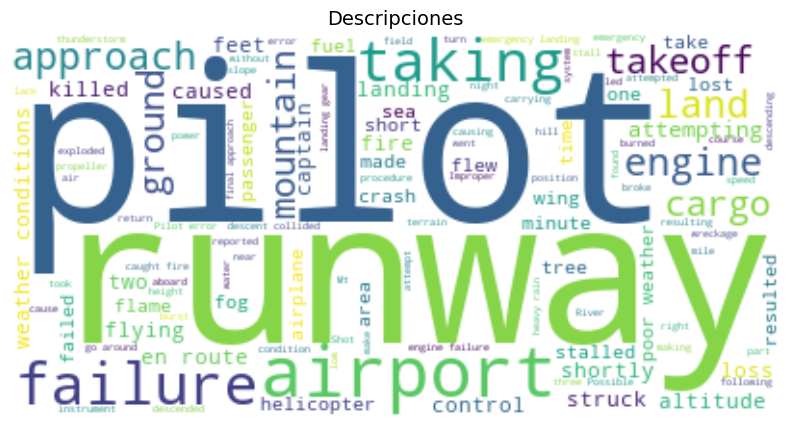

In [787]:
#Se crea una nube de palabras con la columna descripcion, para tener una idea de cuales son las principales causas de accidentes
from wordcloud import WordCloud, STOPWORDS

text = str(df.descripcion.tolist())

stopwords = set(STOPWORDS)
stopwords.add('aircraft')
stopwords.add('plane')
stopwords.add('due')
stopwords.add('hit')
stopwords.add('left')
stopwords.add('ft')
stopwords.add('crashed')
stopwords.add('flight')
stopwords.add('accident')
stopwords.add('crew')

wc = WordCloud(background_color="white", max_words=2000,stopwords=stopwords)
wc.generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Descripciones', loc='Center', fontsize=14)
plt.savefig('./aircraft_wordcloud.png', dpi=50)
plt.show()

In [788]:
# Creamos columna de sobrevivientes
df['sobrevivientes'] = df['total_a_bordo'] - df['total_de_fallecidos']
# Cantidad de sobrevivientes por año
sobrevivientes_por_año = df.groupby(df['año'])['sobrevivientes'].sum()
sobrevivientes_por_año

año
1908      1.0
1909      0.0
1912      0.0
1913      6.0
1915     24.0
        ...  
2017     31.0
2018    365.0
2019    127.0
2020    348.0
2021     49.0
Name: sobrevivientes, Length: 111, dtype: float64

In [789]:
#Analisis descriptivo
df.describe()

,total_a_bordo,pasajeros_a_bordo,tripulacion_a_bordo,total_de_fallecidos,pasajeros_fallecidos,tripulacion_fallecida,fallecidos_en_tierra,año,mes,dia,sobrevivientes
count,4991.000000,4787.000000,4789.000000,5000.000000,4773.000000,4773.000000,4964.000000,5008.000000,5008.000000,5008.000000,4991.000000
mean,31.121218,26.877376,4.519524,22.294000,18.940708,3.587262,1.718372,1970.851637,6.696086,15.785743,8.801643
std,45.479965,44.035342,3.758072,35.000385,34.065190,3.177315,55.495544,24.703696,3.529370,8.798060,30.639214
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1908.000000,1.000000,1.000000,0.000000
25%,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000,1951.000000,4.000000,8.000000,0.000000
50%,16.000000,12.000000,4.000000,11.000000,7.000000,3.000000,0.000000,1970.000000,7.000000,16.000000,0.000000
75%,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,0.000000,1992.000000,10.000000,23.000000,3.000000
max,644.000000,614.000000,83.000000,583.000000,560.000000,43.000000,2750.000000,2021.000000,12.000000,31.000000,516.000000


Se puede ver que hay una gran diferencia entre los valores máximos respecto a la media, por lo que haremos un análisis de outliers.

# Outliers

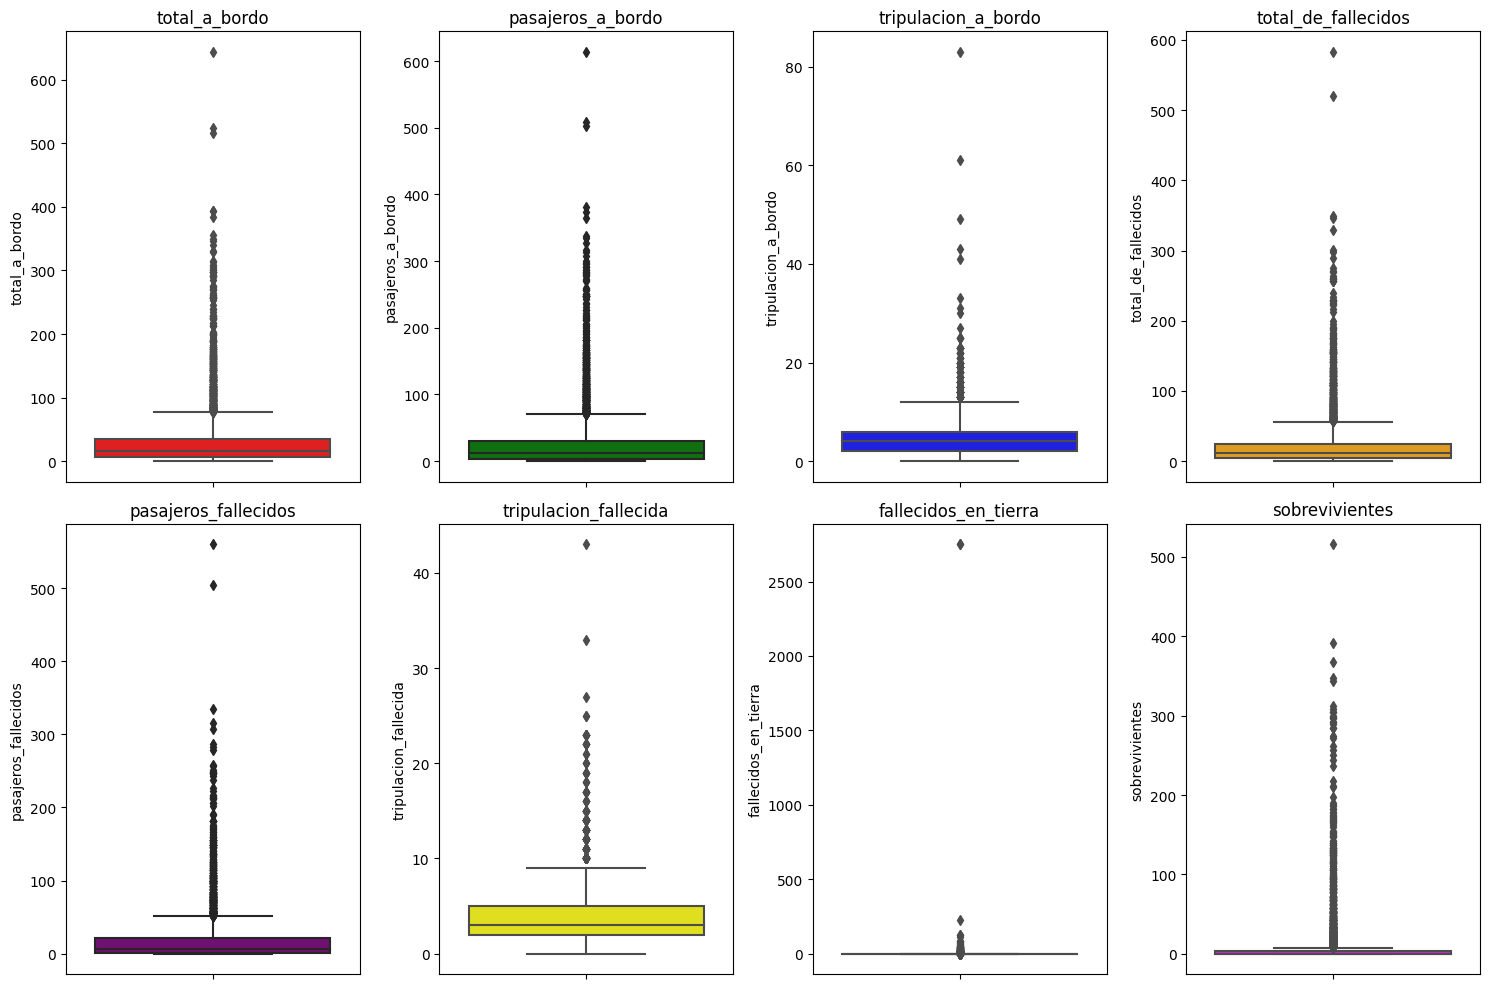

In [790]:
#Graficamos outliers
columnas = ['total_a_bordo','pasajeros_a_bordo','tripulacion_a_bordo','total_de_fallecidos','pasajeros_fallecidos','tripulacion_fallecida',	'fallecidos_en_tierra', 'sobrevivientes']
colores = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'cyan', 'magenta']

plt.figure(figsize=(15, 10))

for i, column in enumerate(columnas):
    plt.subplot(2, 4, i+1)  
    sns.boxplot(y=df[column], color=colores[i])
    plt.title(column)

plt.tight_layout()
plt.show()

Se identifica un outlier sobresaliente en la colomna 'fallecidos en tierra', verificamos y este numero se debe al evento del 9/11

In [791]:
df[df['fallecidos_en_tierra'] > 2500]

,hora_declarada,operador,tipo_de_avion,total_a_bordo,pasajeros_a_bordo,tripulacion_a_bordo,total_de_fallecidos,pasajeros_fallecidos,tripulacion_fallecida,fallecidos_en_tierra,descripcion,año,mes,dia,pais,tipo_operador,tipo_aeronave,sobrevivientes
4346,08:47:00,American Airlines,Boeing 767-223ER,92.0,81.0,11.0,92.0,81.0,11.0,2750.0,The aircraft was hijacked shortly after it lef...,2001,9,11,United States,pasajeros,avion,0.0
4347,09:03:00,United Air Lines,Boeing B-767-222,65.0,56.0,9.0,65.0,56.0,9.0,2750.0,The aircraft was hijacked shortly after it lef...,2001,9,11,United States,pasajeros,avion,0.0


In [792]:
# Fallecidos por año
fallecidos_por_anio = df.groupby(df['año'])['total_de_fallecidos'].sum().reset_index()
fallecidos_por_anio

,año,total_de_fallecidos
0,1908,1.0
1,1909,1.0
2,1912,5.0
3,1913,43.0
4,1915,36.0
...,...,...
106,2017,214.0
107,2018,874.0
108,2019,305.0
109,2020,355.0


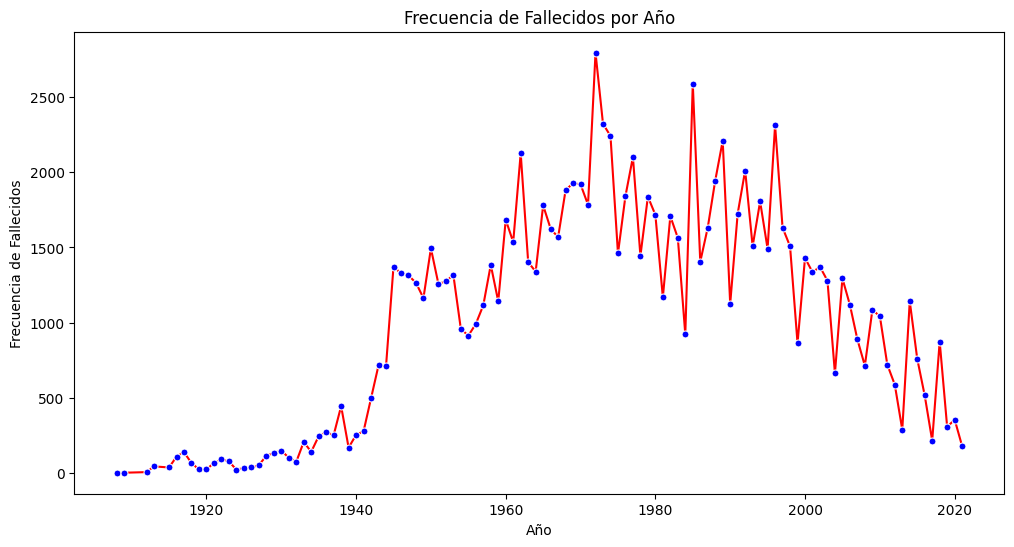

In [793]:
# Crear un gráfico de líneas para la frecuencia de fallecidos por año

plt.figure(figsize=(12, 6))
sns.lineplot(data=fallecidos_por_anio, x='año', y='total_de_fallecidos', color='r', marker='o', markersize=5, markerfacecolor='b')

plt.xlabel('Año')
plt.ylabel('Frecuencia de Fallecidos')
plt.title('Frecuencia de Fallecidos por Año')
plt.show()


Se puede observar que en el año 1975 aproximadamente fue el año con mas fallecidos

In [794]:
# Realizamos un conteo de accidentes por año
accidentes_por_año = df['año'].value_counts().sort_index(ascending=True)
accidentes_por_año

año
1908     1
1909     1
1912     1
1913     3
1915     2
        ..
2017    15
2018    19
2019    13
2020     8
2021     7
Name: count, Length: 111, dtype: int64

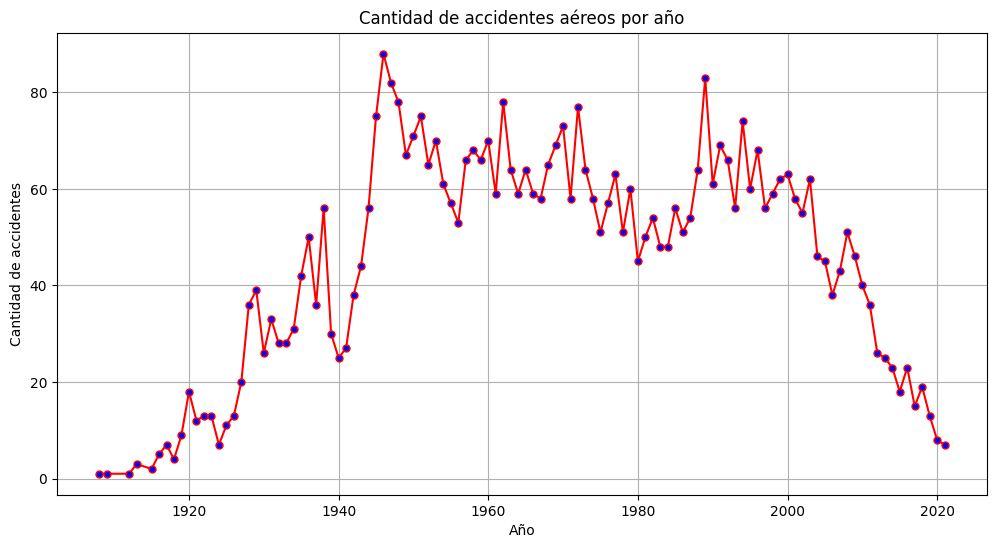

In [795]:
# Hacemos un grafico de linea para visualizar tendencias a lo largo del tiempo
plt.figure(figsize=(12,6))
accidentes_por_año.plot(kind='line',color='r', marker = "o", markersize=5, markerfacecolor='b')
plt.title('Cantidad de accidentes aéreos por año')
plt.plot()
plt.xlabel('Año')
plt.ylabel('Cantidad de accidentes')
plt.grid(True)
plt.show()

In [796]:
# Agrupamos por año y contamos la cantidad de accidentes
accidents_by_year = df.groupby('año').size().reset_index(name='total_accidentes')
top_10_years = accidents_by_year.sort_values(by='total_accidentes', ascending=False).head(10)
top_10_years

,año,total_accidentes
35,1946,88
78,1989,83
36,1947,82
37,1948,78
51,1962,78
61,1972,77
34,1945,75
40,1951,75
83,1994,74
59,1970,73


En este grafico y acompañado del top 10 de accidentes por año podemos observar que en el año 1946 se generaron mayor cantidad de accidentes

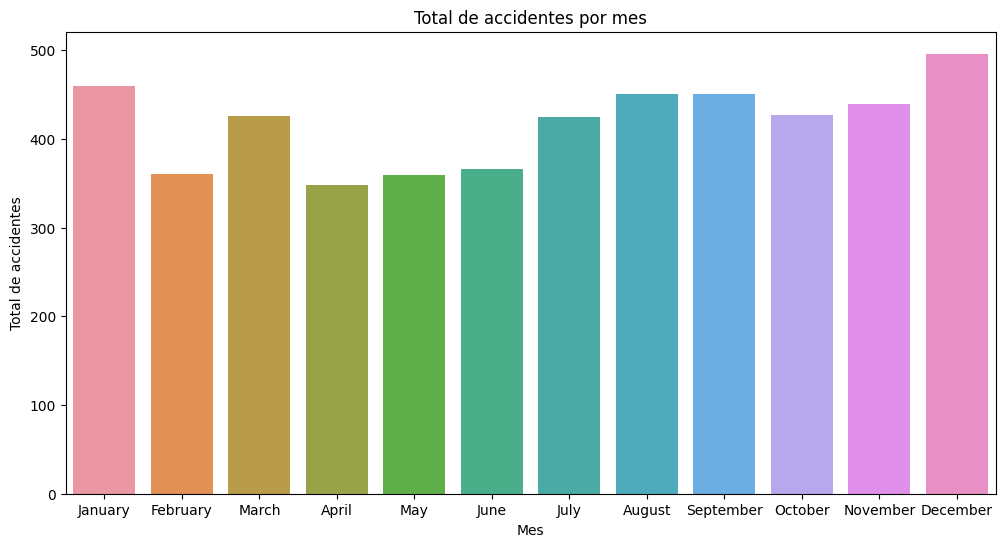

In [798]:
#Cuál ha sido el mes histórico con mayor cantidad de accidentes?
import calendar
# Obtenemos los nombres de los meses
df['mes'] = df['mes'].apply(lambda x: calendar.month_name[x])
# Agrupamos por mes y contamos la cantidad de accidentes
accidentes_por_mes = df.groupby('mes').size().reset_index(name='total_accidentes')

# Ordenamos los meses de forma cíclica
ordenar_meses = list(calendar.month_name)[1:]  # Lista de nombres de los meses sin el primer elemento (vacío)
accidentes_por_mes['mes'] = pd.Categorical(accidentes_por_mes['mes'], categories=ordenar_meses, ordered=True)
accidentes_por_mes = accidentes_por_mes.sort_values('mes')

plt.figure(figsize=(12, 6))
sns.barplot(data=accidentes_por_mes, x='mes', y='total_accidentes', )
plt.xlabel('Mes')
plt.ylabel('Total de accidentes')
plt.title('Total de accidentes por mes')
plt.show()

Diciembre es el mes con mas accidentes, sin embargo no se observa una gran diferencia con los otros meses.

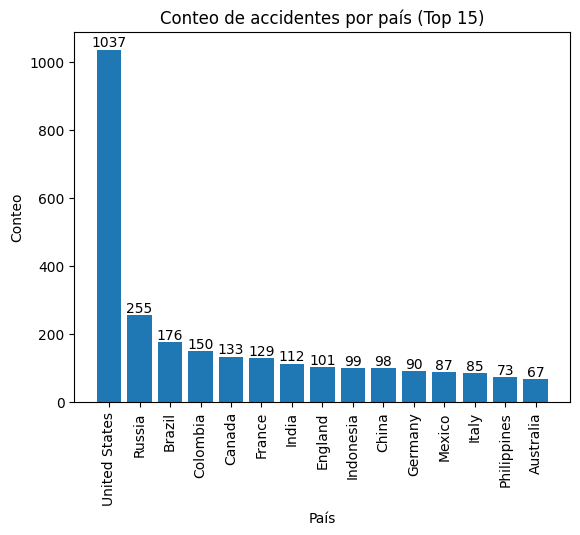

In [739]:
#Cantidad de accidentes por pais
#Filtramos para sacar 'otro'
df_filtrado = df[df['pais'] != 'otro']

cant_por_pais = df_filtrado['pais'].value_counts().head(15)

fig, ax = plt.subplots()
barras = ax.bar(cant_por_pais.index, cant_por_pais.values)
ax.set_title('Conteo de accidentes por país (Top 15)')
ax.set_xlabel('País')
ax.set_ylabel('Conteo')
# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=90)

for bar in barras:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, height,
            ha='center', va='bottom')

plt.show()

Observamos que Estados Unidos es el país con mas accidentes aereos por una amplia diferencia con los demás

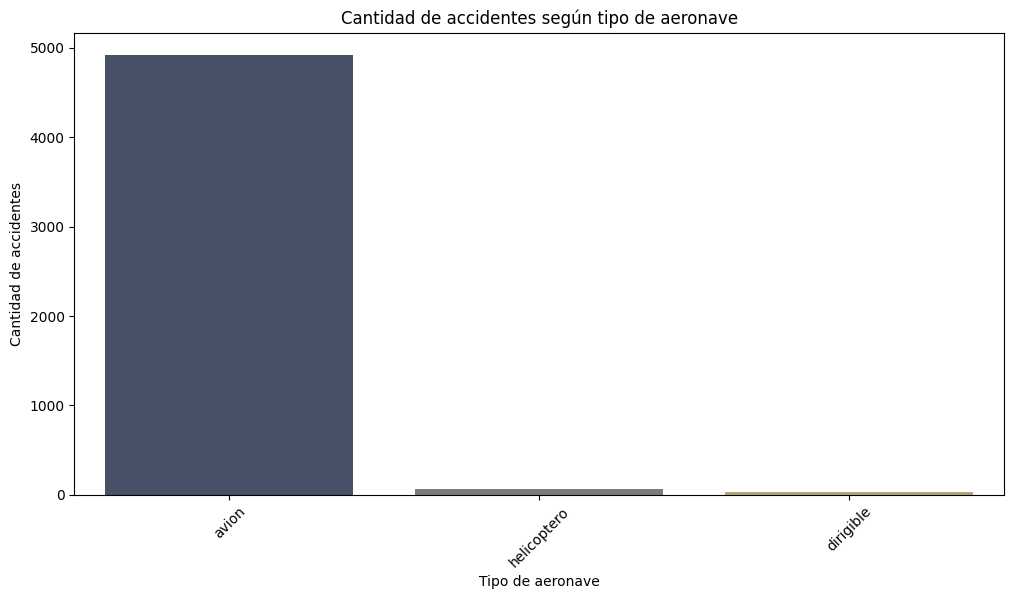

In [740]:
#cantidad de accidentes segun tipo de areonave 
tipo_ac = df['tipo_aeronave'].value_counts().sort_values(ascending=False) 
plt.figure(figsize=(12, 6))
sns.barplot(x=tipo_ac.index, y=tipo_ac.values, palette='cividis')
plt.xticks(rotation=45)

plt.xlabel('Tipo de aeronave')
plt.ylabel('Cantidad de accidentes')
plt.title('Cantidad de accidentes según tipo de aeronave')

plt.show()

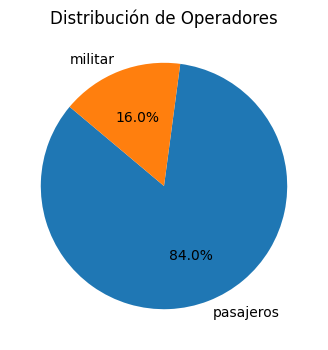

In [741]:
# observamos el porcentaje de operadores militares y de pasajeros
conteo_operadores = df['tipo_operador'].value_counts()
plt.figure(figsize=(4, 4)) 
plt.pie(conteo_operadores, labels=conteo_operadores.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Operadores')
plt.show()


Se evidencia que una importante cantidad de accidentes aéreos corresponden a aviones de carácter civil, esto tambien se debe a que los vuelos civiles son mas frecuentes en terminos generales.

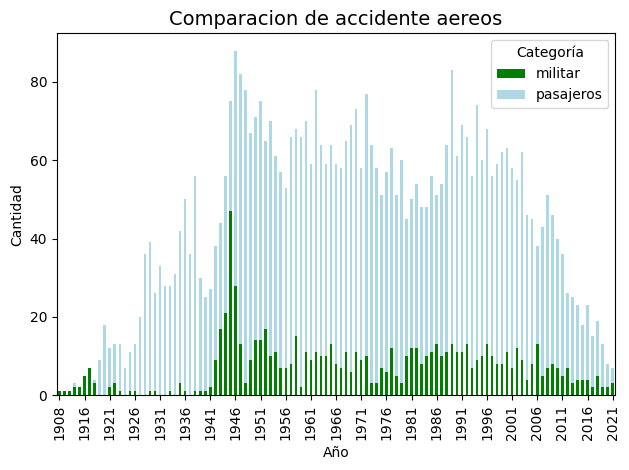

In [742]:
contar_por_categoria_y_año = df.groupby(['año', 'tipo_operador']).size().unstack(fill_value=0)

# Crear un gráfico de barras apiladas
contar_por_categoria_y_año.plot(kind='bar', stacked=True, color=['green', 'lightblue'])
plt.xlabel('Año', fontsize=10)
plt.ylabel('Cantidad', fontsize=10)
plt.title('Comparacion de accidente aereos', loc='Center', fontsize=14)
plt.legend(title='Categoría', fontsize=10)
# Personalizar los marcadores del eje x para mostrar solo cada 5 años
años = contar_por_categoria_y_año.index
plt.xticks(range(0, len(años), 5), años[::5])

plt.tight_layout()
plt.show()

Se visualiza que como nombramos anteriormente en 1946 es el año que tiene mas accidentes tanto de caracter militar como de pasajeros

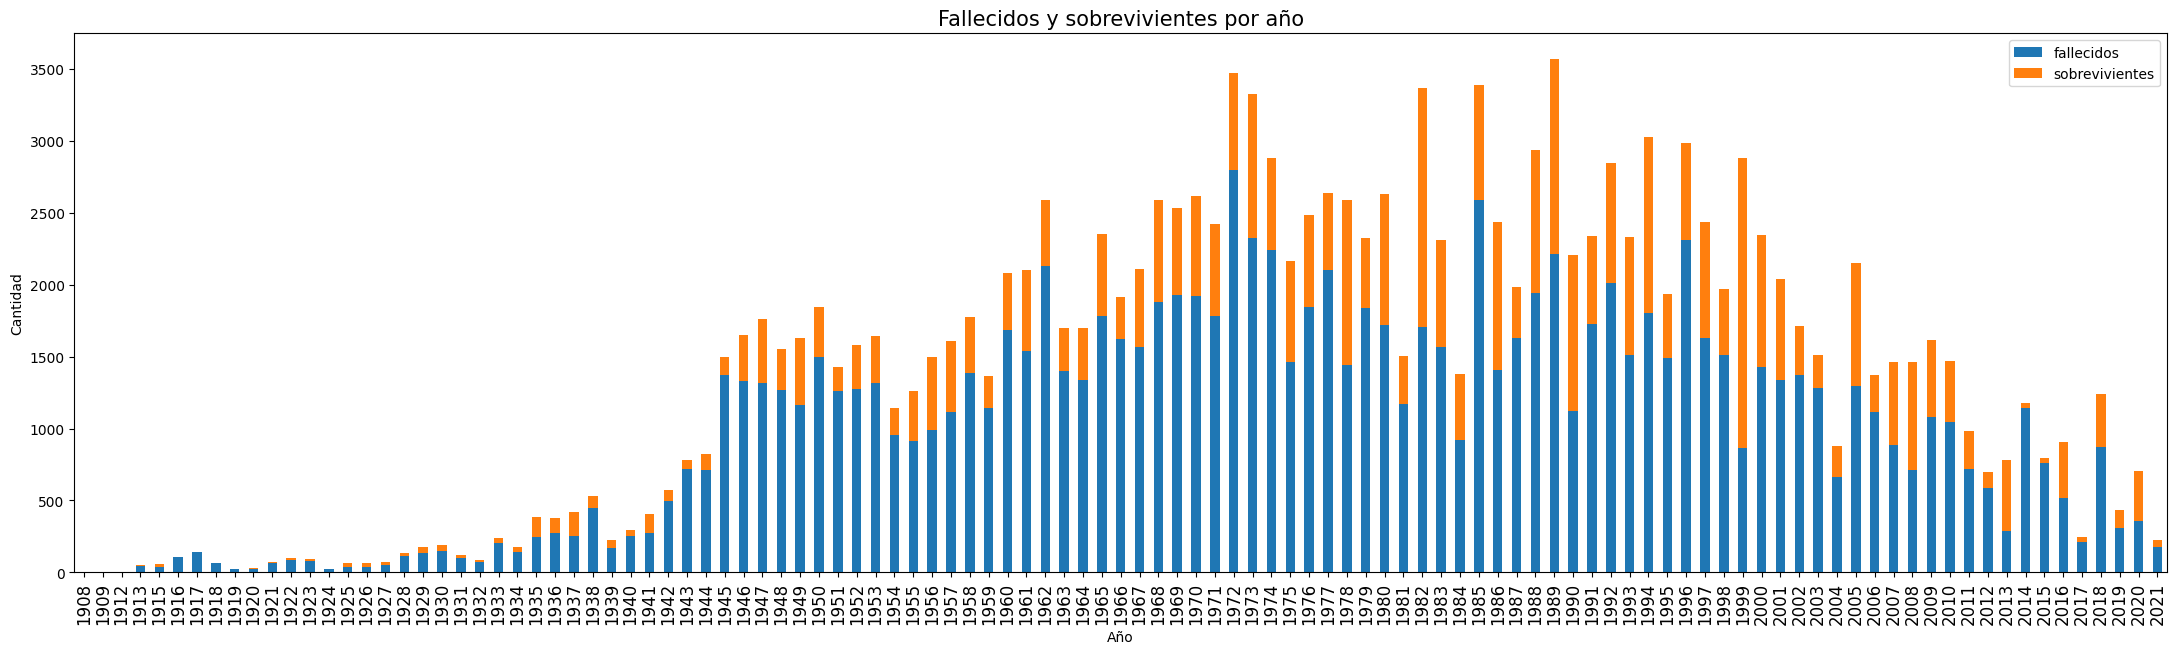

In [743]:
# Calculamos la columna de Fallecidos
df["fallecidos"] = df["total_de_fallecidos"]

# Se crea el gráfico de barras
figure = plt.figure(figsize=(27, 7))
axis = figure.add_subplot(1, 1, 1)
fallecidos_a_bordo_nuevo = df.pivot_table(values=["sobrevivientes", "fallecidos"], index="año", aggfunc=np.sum)
fallecidos_a_bordo_nuevo.plot(kind="bar", stacked=True, ax=axis)
plt.title("Fallecidos y sobrevivientes por año", fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.xlabel("Año")
plt.ylabel("Cantidad")
plt.show()

Se puede observar que en la mayoria de los casos los fallecidos son mas que los sobrevivientes

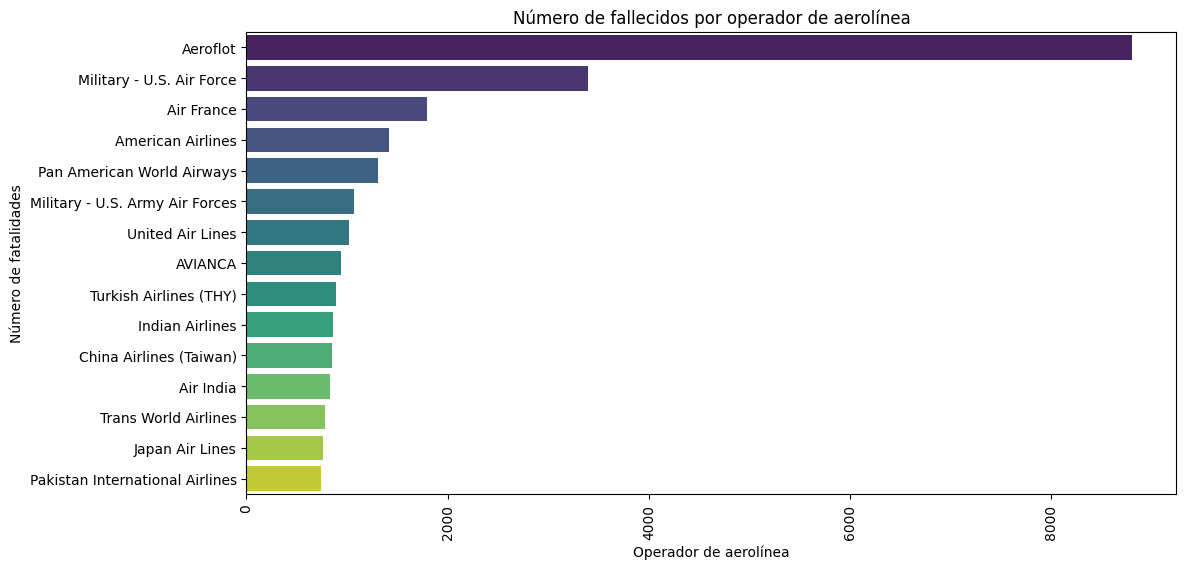

In [744]:
# Agrupamos por operador
fallecidos_por_operador = df.groupby('operador')['total_de_fallecidos'].sum().reset_index()
fallecidos_por_operador = fallecidos_por_operador.nlargest(15, 'total_de_fallecidos')

plt.figure(figsize=(12, 6))
sns.barplot(y='operador', x='total_de_fallecidos', data=fallecidos_por_operador, palette='viridis')
plt.xlabel('Operador de aerolínea')
plt.ylabel('Número de fatalidades')
plt.title('Número de fallecidos por operador de aerolínea')
plt.xticks(rotation=90)
plt.show()

In [745]:
df.columns

Index(['hora_declarada', 'operador', 'tipo_de_avion', 'total_a_bordo',
       'pasajeros_a_bordo', 'tripulacion_a_bordo', 'total_de_fallecidos',
       'pasajeros_fallecidos', 'tripulacion_fallecida', 'fallecidos_en_tierra',
       'descripcion', 'año', 'mes', 'dia', 'pais', 'tipo_operador',
       'tipo_aeronave', 'sobrevivientes', 'fallecidos'],
      dtype='object')

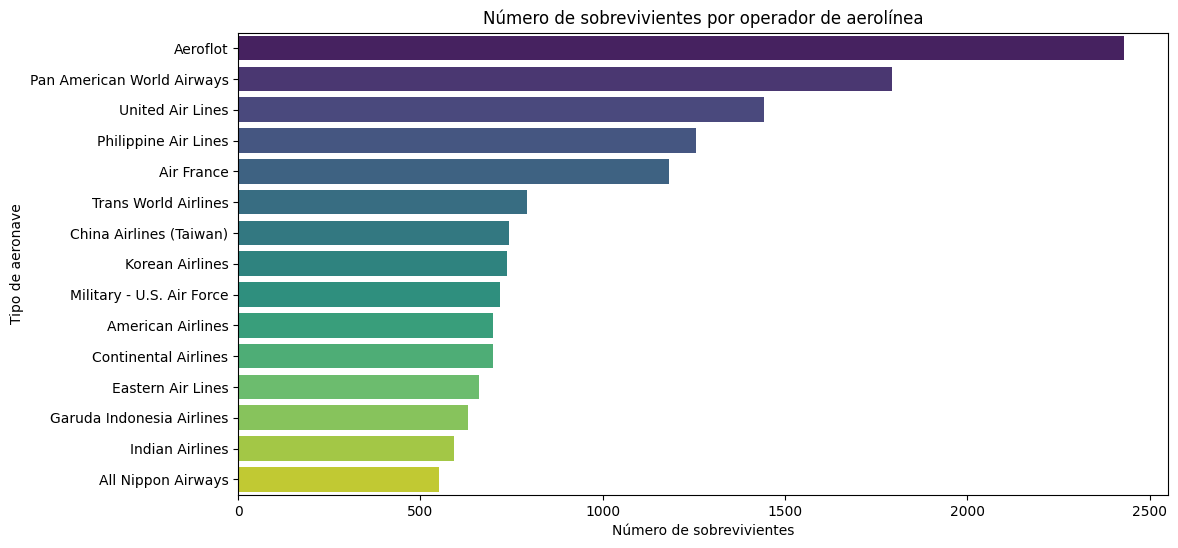

In [746]:
#Cuáles aerolíneas resultaron más seguras?
sobrevivientes_por_operador = df.groupby('operador')['sobrevivientes'].sum().reset_index()
# Dejamos solamente las 15 más seguras
top_airline_survivors = sobrevivientes_por_operador.nlargest(15, 'sobrevivientes')

plt.figure(figsize=(12, 6))
sns.barplot(x='sobrevivientes', y='operador', data=top_airline_survivors, palette='viridis')
plt.xlabel('Número de sobrevivientes')
plt.ylabel('Tipo de aeronave')
plt.title('Número de sobrevivientes por operador de aerolínea')
plt.show()

Podemos observar que el operador Aeroflot es aquel que tiene mayor cantidad de fallecidos pero a su vez el que tiene mayor cantidad de sobrevivientes. También se puede observar a simple vista que el operador Pan American World Airways tiene baja cantidad de fallecidos y es el segundo con mas sobrevivientes por lo que puede considerarse mas segura que Aeroflot.

In [747]:
# Realiza la resta de las dos tablas
resultado = fallecidos_por_operador.merge(sobrevivientes_por_operador, on='operador', suffixes=( '_fallecidos','_sobrevivientes'))
resultado['diferencia'] = resultado['sobrevivientes'] - resultado['total_de_fallecidos']
resultado = resultado.sort_values(by='diferencia', ascending=False)
resultado

,operador,total_de_fallecidos,sobrevivientes,diferencia
4,Pan American World Airways,1303.0,1794.0,491.0
6,United Air Lines,1019.0,1442.0,423.0
12,Trans World Airlines,784.0,793.0,9.0
10,China Airlines (Taiwan),847.0,743.0,-104.0
9,Indian Airlines,860.0,591.0,-269.0
13,Japan Air Lines,764.0,330.0,-434.0
2,Air France,1798.0,1181.0,-617.0
14,Pakistan International Airlines,743.0,97.0,-646.0
3,American Airlines,1422.0,700.0,-722.0
11,Air India,827.0,100.0,-727.0


Complementamos el analisis con esta tabla que nos muestra que Pan American World Airways y United Air Lines, y en menor medida Trans World Airlines	tienen mas sobrevivientes que fallecidos por lo que las hace más seguras.

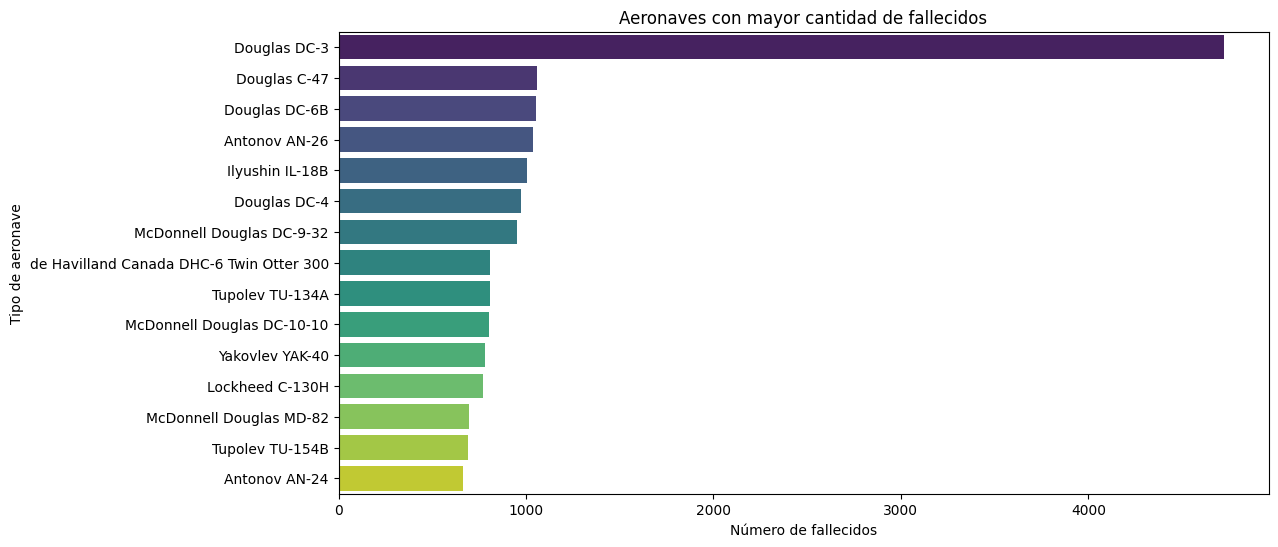

In [748]:
#Qué marca de aeronave presentó mayor cantidad de fatalidades a lo largo de los años?
# Agrupamos por marca de aeronave
fallecidos_por_aeronave = df.groupby('tipo_de_avion')['total_de_fallecidos'].sum().reset_index()
top_fallecidos_por_aeronave = fallecidos_por_aeronave.nlargest(15, 'total_de_fallecidos')

plt.figure(figsize=(12, 6))
sns.barplot(x='total_de_fallecidos', y='tipo_de_avion', data=top_fallecidos_por_aeronave, palette='viridis')
plt.xlabel('Número de fallecidos')
plt.ylabel('Tipo de aeronave')
plt.title('Aeronaves con mayor cantidad de fallecidos')
plt.show()

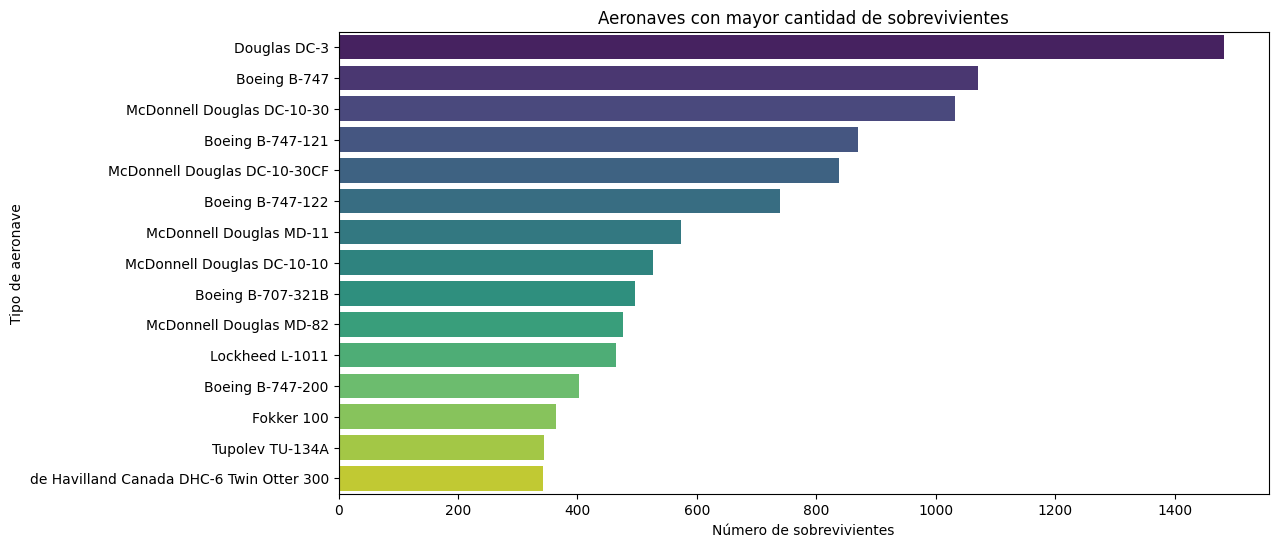

In [749]:
#Cuáles aeronaves resultaron más seguras?
# Calculamos los sobrevivientes por marca de aeronave
sobrevivientes_por_aeronave = df.groupby('tipo_de_avion')['sobrevivientes'].sum().reset_index()

# Dejamos solamente las 15 más seguras
top_sobrevivientes_po_aeronave = sobrevivientes_por_aeronave.nlargest(15, 'sobrevivientes')

# Graficamos
plt.figure(figsize=(12, 6))
sns.barplot(x='sobrevivientes', y='tipo_de_avion', data=top_sobrevivientes_po_aeronave, palette='viridis')
plt.xlabel('Número de sobrevivientes')
plt.ylabel('Tipo de aeronave')
plt.title('Aeronaves con mayor cantidad de sobrevivientes')
plt.show()

In [750]:
# Realiza la resta de las dos tablas
resultado = top_fallecidos_por_aeronave.merge(top_sobrevivientes_po_aeronave, on='tipo_de_avion', suffixes=( '_fallecidos','_sobrevivientes'))
resultado['diferencia'] = resultado['sobrevivientes'] - resultado['total_de_fallecidos']
resultado = resultado.sort_values(by='diferencia', ascending=False)
resultado

,tipo_de_avion,total_de_fallecidos,sobrevivientes,diferencia
4,McDonnell Douglas MD-82,695.0,477.0,-218.0
3,McDonnell Douglas DC-10-10,804.0,527.0,-277.0
2,Tupolev TU-134A,807.0,344.0,-463.0
1,de Havilland Canada DHC-6 Twin Otter 300,810.0,342.0,-468.0
0,Douglas DC-3,4725.0,1483.0,-3242.0


Podemos observar que la aeronave Douglas DC-3 es aquella que tiene mayor cantidad de fallecidos pero a su vez la que tiene mayor cantidad de sobrevivientes. Pero al observar la tabla vemos que es muy grande la diferencia entre sobrevivientes y fallecidos.
Por otro lado se ve que las aeronaves McDonnell Douglas MD-82 y McDonnell Douglas DC-10-10 fueron las mas seguras con menor diferencia entre sobrevivientes y fallecidos. 